## **Create Dataset**

In [47]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
data = pd.read_csv("DL_lab_data_quote.csv")
data = data.iloc[:-1,1:].values
data

array([['Celebrate Your Small Wins', 1.0],
       ['All our dreams can come true', 1.0],
       ['Things work out best for those who make the best of how things work out',
        1.0],
       ['unleash hatred and terror', 0.0],
       ['Unhappy people are rich', 0.0],
       ['You will win, if you work hard', 1.0],
       ['Be lazy and win life', 0.0],
       ['Life is short', 0.0],
       ['Be lazy,don’t work hard   ', 0.0],
       ['Life is short, dont be lazy.', 1.0],
       ['Don’t be lazy to win.', 1.0],
       ['Happiness is a direction, not a place', 1.0],
       ['People should find happiness in the little things', 1.0],
       ['Jealousy is the best', 0.0],
       ['Greed is best for man', 0.0],
       ['Depression is goal of life', 0.0],
       ['Courage makes you strong', 1.0],
       ['Dare to dream', 1.0],
       ['Life is pathetic.', 0.0],
       ['Be tired of everyone.', 0.0],
       ['arrogance is needed.', 0.0],
       ['Be irresponsible.', 0.0],
       ['Forgiveness 

In [12]:
my_regex_tokenizer = RegexpTokenizer(pattern="[a-z]+")
for i in range(0,20):
  data[i,0]=" ".join(my_regex_tokenizer.tokenize(data[i,0].lower()))
data

array([['celebrate your small wins', 1.0],
       ['all our dreams can come true', 1.0],
       ['things work out best for those who make the best of how things work out',
        1.0],
       ['unleash hatred and terror', 0.0],
       ['unhappy people are rich', 0.0],
       ['you will win if you work hard', 1.0],
       ['be lazy and win life', 0.0],
       ['life is short', 0.0],
       ['be lazy don t work hard', 0.0],
       ['life is short dont be lazy', 1.0],
       ['don t be lazy to win', 1.0],
       ['happiness is a direction not a place', 1.0],
       ['people should find happiness in the little things', 1.0],
       ['jealousy is the best', 0.0],
       ['greed is best for man', 0.0],
       ['depression is goal of life', 0.0],
       ['courage makes you strong', 1.0],
       ['dare to dream', 1.0],
       ['life is pathetic', 0.0],
       ['be tired of everyone', 0.0],
       ['arrogance is needed.', 0.0],
       ['Be irresponsible.', 0.0],
       ['Forgiveness is virtue'

In [15]:
sb = SnowballStemmer(language='english')
for i in range(20):
  
  line= data[i,0].split(" ")
  l= len(line)
  new_line=""
  for j in range(l):
    if(line[j] not in stopwords.words()):
      new_line= new_line+" "+sb.stem(line[j])
  
  print(new_line)
  data[i, 0]=new_line

 celebr small win
 dream true
 thing work best make best thing work
 unleash hatr terror
 unhappi peopl rich
 win work hard
 lazi win life
 life short
 lazi work hard
 life short dont lazi
 lazi win
 happi direct place
 peopl find happi littl thing
 jealousi best
 greed best
 depress goal life
 courag make strong
 dare dream
 life pathet
 tire everyon


In [16]:
np.random.shuffle(data)
data

array([[' life short', 0.0],
       [' greed best', 0.0],
       [' lazi win', 1.0],
       ['Be irresponsible.', 0.0],
       ['Forgiveness is virtue', 1.0],
       [' unleash hatr terror', 0.0],
       [' unhappi peopl rich', 0.0],
       [' depress goal life', 0.0],
       [' lazi win life', 0.0],
       [' win work hard', 1.0],
       [' tire everyon', 0.0],
       [' courag make strong', 1.0],
       [' life pathet', 0.0],
       [' lazi work hard', 0.0],
       [' jealousi best', 0.0],
       [' thing work best make best thing work', 1.0],
       [' peopl find happi littl thing', 1.0],
       [' dare dream', 1.0],
       [' dream true', 1.0],
       [' celebr small win', 1.0],
       ['Honesty is best policy', 1.0],
       [' life short dont lazi', 1.0],
       ['arrogance is needed.', 0.0],
       [' happi direct place', 1.0]], dtype=object)

In [18]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data[:,0])

In [19]:
print(len(vectorizer.get_feature_names()))

44


In [21]:
X_data = X.toarray()
y_data = data[:,1]

In [22]:
X_data=np.array(X_data, dtype=np.float)
y_data=np.array(y_data, dtype=np.float)

In [24]:
X_train, X_test, y_train, y_test= train_test_split(X_data, y_data, test_size= 0.2)

## Modelling

In [33]:
model = Sequential()

## For 32 Nodes

In [34]:
model.add( Dense(units = 32, activation = "relu",  input_shape = (44,) ))
model.add( Dense(units = 1, activation='sigmoid'))

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                1440      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,473
Trainable params: 1,473
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

In [37]:
hist = model.fit(x= X_train, y = y_train.reshape(-1,1), batch_size=1, epochs=100, validation_split=0.2, shuffle=True)

Epoch 1/100
15/15 [==============================] - 0s 10ms/step - loss: 0.7074 - accuracy: 0.5333 - val_loss: 0.8998 - val_accuracy: 0.2500
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6790 - accuracy: 0.5333 - val_loss: 0.9023 - val_accuracy: 0.2500
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6559 - accuracy: 0.5333 - val_loss: 0.8977 - val_accuracy: 0.2500
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6380 - accuracy: 0.5333 - val_loss: 0.8910 - val_accuracy: 0.2500
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6152 - accuracy: 0.5333 - val_loss: 0.8907 - val_accuracy: 0.2500
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5974 - accuracy: 0.6667 - val_loss: 0.8899 - val_accuracy: 0.2500
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5783 - accuracy: 0.6667 - val_loss: 0.8894 - val_accuracy: 0.2500
Epoch 8/100


In [39]:
accuracy = model.evaluate(X_test, y_test)[1]
print('Accuracy: %.2f' % (accuracy*100))

1/1 [==============================] - 0s 1ms/step - loss: 0.5791 - accuracy: 0.8000
Accuracy: 80.00


## For 64 Nodes

In [40]:
model = Sequential()
model.add( Dense(units = 64, activation = "relu",  input_shape = (44,) ))
model.add( Dense(units = 1, activation='sigmoid'))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])
hist = model.fit(x= X_train, y = y_train.reshape(-1,1), batch_size=1, epochs=100, validation_split=0.2, shuffle=True)

Epoch 1/100
15/15 [==============================] - 0s 8ms/step - loss: 0.7080 - accuracy: 0.5333 - val_loss: 0.6866 - val_accuracy: 0.7500
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.6000 - val_loss: 0.6974 - val_accuracy: 0.7500
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6447 - accuracy: 0.6667 - val_loss: 0.7070 - val_accuracy: 0.7500
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6193 - accuracy: 0.6667 - val_loss: 0.7192 - val_accuracy: 0.7500
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5941 - accuracy: 0.8000 - val_loss: 0.7302 - val_accuracy: 0.7500
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5666 - accuracy: 0.8667 - val_loss: 0.7410 - val_accuracy: 0.7500
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 0.5429 - accuracy: 0.9333 - val_loss: 0.7465 - val_accuracy: 0.7500
Epoch 8/100
1

In [41]:
accuracy = model.evaluate(X_test, y_test)[1]
print('Accuracy: %.2f' % (accuracy*100))

1/1 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.6000
Accuracy: 60.00


## For 16 Nodes

In [42]:
model = Sequential()
model.add( Dense(units = 16, activation = "relu",  input_shape = (44,) ))
model.add( Dense(units = 1, activation='sigmoid'))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])
hist = model.fit(x= X_train, y = y_train.reshape(-1,1), batch_size=1, epochs=100, validation_split=0.2, shuffle=True)

Epoch 1/100
15/15 [==============================] - 0s 8ms/step - loss: 0.7393 - accuracy: 0.4000 - val_loss: 0.6599 - val_accuracy: 0.5000
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7252 - accuracy: 0.4000 - val_loss: 0.6643 - val_accuracy: 0.5000
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7142 - accuracy: 0.4000 - val_loss: 0.6681 - val_accuracy: 0.5000
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7027 - accuracy: 0.4667 - val_loss: 0.6708 - val_accuracy: 0.5000
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5333 - val_loss: 0.6749 - val_accuracy: 0.5000
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6831 - accuracy: 0.5333 - val_loss: 0.6784 - val_accuracy: 0.5000
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6724 - accuracy: 0.6000 - val_loss: 0.6823 - val_accuracy: 0.5000
Epoch 8/100
1

In [43]:
accuracy = model.evaluate(X_test, y_test)[1]
print('Accuracy: %.2f' % (accuracy*100))

1/1 [==============================] - 0s 1ms/step - loss: 0.8035 - accuracy: 0.6000
Accuracy: 60.00


## For 8 Nodes

In [44]:
model = Sequential()
model.add( Dense(units = 8, activation = "relu",  input_shape = (44,) ))
model.add( Dense(units = 1, activation='sigmoid'))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])
hist = model.fit(x= X_train, y = y_train.reshape(-1,1), batch_size=1, epochs=100, validation_split=0.2, shuffle=True)

Epoch 1/100
15/15 [==============================] - 0s 8ms/step - loss: 0.7356 - accuracy: 0.4667 - val_loss: 0.6091 - val_accuracy: 0.7500
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7227 - accuracy: 0.4667 - val_loss: 0.6123 - val_accuracy: 0.7500
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7101 - accuracy: 0.4667 - val_loss: 0.6145 - val_accuracy: 0.7500
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7001 - accuracy: 0.4667 - val_loss: 0.6163 - val_accuracy: 0.7500
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.4667 - val_loss: 0.6173 - val_accuracy: 0.7500
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6788 - accuracy: 0.4667 - val_loss: 0.6184 - val_accuracy: 0.7500
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 0.6695 - accuracy: 0.4667 - val_loss: 0.6201 - val_accuracy: 0.7500
Epoch 8/100
1

In [45]:
accuracy = model.evaluate(X_test, y_test)[1]
print('Accuracy: %.2f' % (accuracy*100))

1/1 [==============================] - 0s 1ms/step - loss: 0.6191 - accuracy: 0.6000
Accuracy: 60.00


## Graph

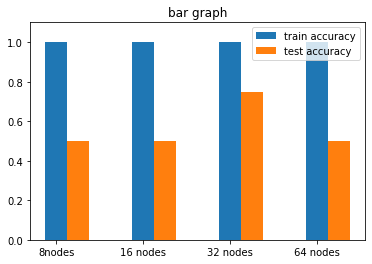

In [48]:
x= np.array([1,2,3,4])*2
train =[1,1,1,1]
test=[0.5,0.50,0.75, 0.50]
plt.bar(x,train,width=0.5, tick_label=["8nodes","16 nodes","32 nodes", "64 nodes"], label="train accuracy")
plt.bar(x+0.5,test,width=0.5, label="test accuracy")
plt.ylim(0,1.1)
plt.title("bar graph")
plt.legend()
plt.show()

In [49]:
model = Sequential()
model.add( Dense(units = 64, activation = "relu",  input_shape = (44,) ))
model.add(Dense(units = 16,activation="relu"))
model.add( Dense(units = 1, activation='sigmoid'))
print(model.summary())
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])
hist = model.fit(x= X_train, y = y_train.reshape(-1,1), batch_size=1, epochs=100, validation_split=0.2, shuffle=True)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                2880      
_________________________________________________________________
dense_13 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 3,937
Trainable params: 3,937
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
15/15 [==============================] - 0s 14ms/step - loss: 0.7143 - accuracy: 0.5333 - val_loss: 0.8391 - val_accuracy: 0.0000e+00
Epoch 2/100
15/15 [==============================] - 0s 3ms/step - loss: 0.6566 - accuracy: 0.6000 - val_loss: 0.8431 - val_accuracy: 0.0000e+00
Epoch 3/100
15/15 [==============================] - 0s 3ms/step - loss: 0.6128 - accu

In [50]:
accuracy = model.evaluate(X_test, y_test)[1]
print('Accuracy: %.2f' % (accuracy*100))

1/1 [==============================] - 0s 1ms/step - loss: 1.5889 - accuracy: 0.4000
Accuracy: 40.00
